## Assignment topic - operators

![Assignment topic - operators](./Assignment_topic-operators.png "Assignment topic - operators")

In [3]:
from dummy_data import *
from random import choice

In [4]:
# Energy Usage

electricity_bill = choice(avg_electric_bill('small'))
natural_gas_bill = choice(avg_gas_bill('small'))
fuel_bill = choice(avg_transport_cost('small'))

def calculate_CO2_from_energy_usage(electricity_bill, natural_gas_bill, fuel_bill):
    
    '''
    This function calculates the CO2 emmissions from energy usage in kgCO2

    Parameters:
        - electricity_bill: the average monthly electricity bill in euros
        - natural_gas_bill: the average monthly natural gas bill in euros
        - fuel_bill: the average monthly fuel bill for transportation in euros
    
    Returns:
        - CO2_from_energy_usage: (float) The CO2 emmissions from energy usage in kgCO2
    '''

    CO2_from_electricity_usage = electricity_bill * 12 * 0.0005
    CO2_from_natural_gas_usage = natural_gas_bill * 12 * 0.0053
    CO2_from_fuel_usage = fuel_bill * 12 * 2.32

    CO2_from_energy_usage = CO2_from_electricity_usage + CO2_from_natural_gas_usage + CO2_from_fuel_usage

    return CO2_from_energy_usage

CO2_from_energy_usage = calculate_CO2_from_energy_usage(electricity_bill, natural_gas_bill, fuel_bill)
print(f"Your company's carbon emmission from energy usage: {CO2_from_energy_usage:.2f} kgCO2")

Your company's carbon emmission from energy usage: 29771.40 kgCO2


In [5]:
# Waste 

waste_per_month = choice(waste_generated_dummy('small'))
recycling_percent = choice(recycled_waste('small'))

def calculate_CO2_from_waste(waste_per_month, recycling_percent):

    '''
    This function calculates the CO2 emissions from waste generation in kgCO2

    Parameters:
        - waste_per_month: waste generated per month in kilograms
        - recycling_percent: percentage of waste that is recycled or composted (0-100)
    
    Returns:
        - CO2_from_waste: (float) The CO2 emissions from waste in kgCO2
    '''

    CO2_from_waste =  waste_per_month * 12 * 0.57 - recycling_percent
    
    return CO2_from_waste

CO2_from_waste = calculate_CO2_from_waste(waste_per_month, recycling_percent)
print(f"Your company's carbon emmission from waste: {CO2_from_waste:.2f} kgCO2")

Your company's carbon emmission from waste: 2756.72 kgCO2


In [6]:
# Business Travel 

distance_km = choice(travel_kms('small'))
fuel_efficiency = choice(vehicle_fuel_efficiency('small'))

def calculate_CO2_from_business_travel(distance_km, fuel_efficiency):

    '''
    This function calculates the CO2 emissions from business travel in kgCO2

    Parameters:
        - distance_km: The number of kilometers traveled by employees for business purposes
        - fuel_efficiency: The average fuel efficiency of the vehicles used for business travel in liters per 100 kilometers

    Returns:
        - CO2_from_business_travel: (float) The CO2 emissions from business travel in kgCO2
    '''

    CO2_from_business_travel = distance_km * 1 / fuel_efficiency * 2.31

    return CO2_from_business_travel

CO2_from_business_travel = calculate_CO2_from_business_travel(distance_km, fuel_efficiency)
print(f"Your company's carbon emmission from business travel: {CO2_from_business_travel:.2f} kgCO2")

Your company's carbon emmission from business travel: 16545.14 kgCO2


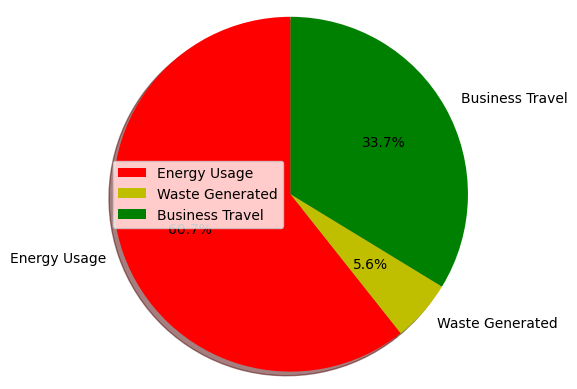

In [7]:
import matplotlib.pyplot as plt

# defining labels
activities = ['Energy Usage', 'Waste Generated', 'Business Travel']

# portion covered by each label
slices = [CO2_from_energy_usage, CO2_from_waste, CO2_from_business_travel]

# color for each label
colors = ['r', 'y', 'g']

# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors, 
        startangle=90, shadow = True, explode = (0, 0, 0),
        radius = 1.2, autopct = '%1.1f%%')

# plotting legend
plt.legend()

# showing the plot

plt.show()

In [27]:
datas = []
from pandas import read_csv, DataFrame

company_names = read_csv('company_names.csv')['fake-company-name']

for i, name in enumerate(company_names):
    if i in range(1, 5):
        company_size = 'small'
    if i in range(5, 10):
        company_size = 'medium'
    else:
        company_size = 'large'
    
    electricity_bill = choice(avg_electric_bill('small'))
    natural_gas_bill = choice(avg_gas_bill('small'))
    fuel_bill = choice(avg_transport_cost('small'))
    company_data = {
        "id": str(i),
        "company_name": name,
        "date": f"2023-{choice(range(1, 13))}-{choice(range(1, 28))}",
        "energy_usage": calculate_CO2_from_energy_usage(
            electricity_bill=electricity_bill,
            natural_gas_bill=natural_gas_bill,
            fuel_bill=fuel_bill,
        ),
        "waste": calculate_CO2_from_waste(
            waste_per_month=choice(waste_generated_dummy(company_size)),
            recycling_percent=choice(recycled_waste(company_size)),
        ),
        "business_travel": calculate_CO2_from_business_travel(
            distance_km=choice(travel_kms(company_size)),
            fuel_efficiency=choice(vehicle_fuel_efficiency(company_size)),
        )
    }
    company_data['total'] = company_data['energy_usage'] + company_data['waste'] + company_data['business_travel']
    datas.append(company_data)

with open("datas.json", "w") as f:
    import json
    from random import shuffle
    
    shuffle(datas)
    json.dump(datas, f)